<a href="https://colab.research.google.com/github/surabhi-priyadarshini/EV_MARKET_SEGMENTAION/blob/main/EV_Market_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_samples
from sklearn.mixture import GaussianMixture
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn import tree
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
#Fetching the data set1
df=pd.read_csv('/content/drive/MyDrive/Ev_india (1).csv')

df.head()
#df.shape

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,Price(Inr)
0,Volkswagen,ID.3 Pure,10.0,160,270,167,250,No,RWD,Type 2 CCS,Hatchback,C,5,2682900.00
1,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,5047429.20
2,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,6084817.20
3,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,2950921.71
4,Lucid,Air,2.8,250,610,180,620,Yes,AWD,Type 2 CCS,Sedan,F,5,9390150.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            90 non-null     object 
 1   Model            90 non-null     object 
 2   AccelSec         90 non-null     float64
 3   TopSpeed_KmH     90 non-null     int64  
 4   Range_Km         90 non-null     int64  
 5   Efficiency_WhKm  90 non-null     int64  
 6   FastCharge_KmH   90 non-null     int64  
 7   RapidCharge      90 non-null     object 
 8   PowerTrain       90 non-null     object 
 9   PlugType         90 non-null     object 
 10  BodyStyle        90 non-null     object 
 11  Segment          90 non-null     object 
 12  Seats            90 non-null     int64  
 13  Price(Inr)       90 non-null     float64
dtypes: float64(2), int64(5), object(7)
memory usage: 10.0+ KB


In [ ]:
df.describe()


,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,Price(Inr)
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,9.000000e+01
mean,7.873333,169.766667,315.388889,187.400000,403.000000,4.755556,4.675252e+06
std,2.889609,32.265420,98.833726,27.767817,172.811842,0.675596,2.784081e+06
min,2.800000,123.000000,95.000000,104.000000,170.000000,2.000000,1.800136e+06
25%,6.050000,150.000000,250.000000,168.000000,232.500000,5.000000,2.989399e+06
50%,7.550000,160.000000,330.000000,180.000000,390.000000,5.000000,3.612748e+06
75%,9.375000,187.500000,383.750000,199.500000,517.500000,5.000000,5.509715e+06
max,22.400000,260.000000,610.000000,273.000000,890.000000,7.000000,1.616724e+07


**Anaysis of different body types of EVs**

In [ ]:



# Analyzing the distribution of body styles
body_style_distribution = df['BodyStyle'].value_counts()

# Calculating average metrics for each body style
body_style_metrics = df.groupby('BodyStyle').agg({
    'AccelSec': 'mean',
    'TopSpeed_KmH': 'mean',
    'Range_Km': 'mean',
    'Efficiency_WhKm': 'mean',
    'Price(Inr)': 'mean'
}).reset_index()

# Displaying the results
print(body_style_distribution)
print(body_style_metrics)


BodyStyle
SUV          41
Hatchback    32
Sedan         7
Liftback      3
SPV           3
Cabrio        2
MPV           1
Station       1
Name: count, dtype: int64
   BodyStyle   AccelSec  TopSpeed_KmH    Range_Km  Efficiency_WhKm  \
0     Cabrio  10.450000    140.000000  172.500000       172.000000   
1  Hatchback   8.868750    152.062500  268.593750       172.687500   
2   Liftback   8.133333    175.000000  408.333333       146.000000   
3        MPV   7.300000    150.000000  335.000000       173.000000   
4        SPV  15.466667    131.000000  226.666667       222.333333   
5        SUV   7.268293    173.292683  336.097561       197.951220   
6      Sedan   3.471429    244.285714  434.285714       197.857143   
7    Station   3.500000    250.000000  385.000000       217.000000   

     Price(Inr)  
0  2.793122e+06  
1  3.120495e+06  
2  7.151389e+06  
3  3.747654e+06  
4  4.229353e+06  
5  4.615447e+06  
6  1.068470e+07  
7  1.341450e+07  



**Distribution of body styles**


<ipython-input-6-025e945ce025>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=body_style_distribution.index, y=body_style_distribution.values, palette='viridis')


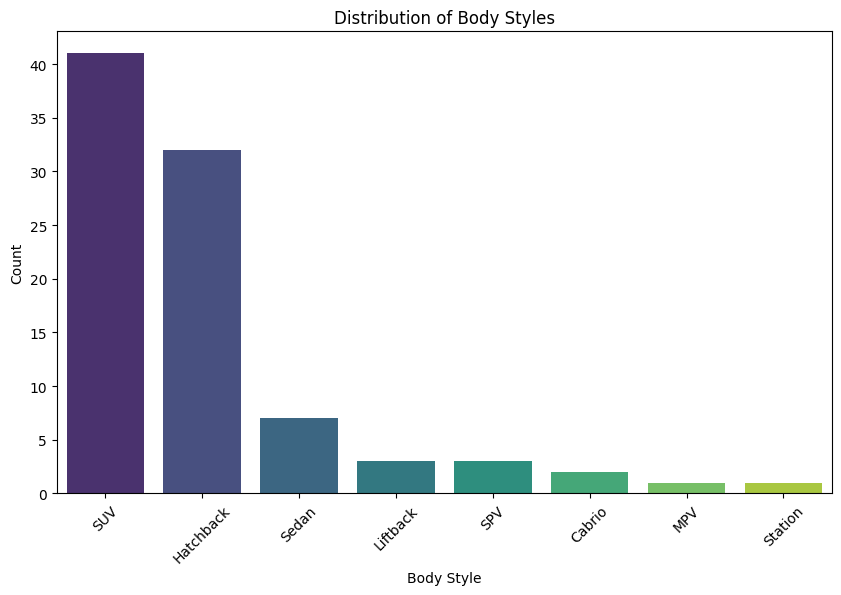

In [ ]:


# Analyzing the distribution of body styles
body_style_distribution = df['BodyStyle'].value_counts()

# Calculating average metrics for each body style
body_style_metrics = df.groupby('BodyStyle').agg({
    'AccelSec': 'mean',
    'TopSpeed_KmH': 'mean',
    'Range_Km': 'mean',
    'Efficiency_WhKm': 'mean',
    'Price(Inr)': 'mean'
}).reset_index()

# Plotting the distribution of body styles
plt.figure(figsize=(10, 6))
sns.barplot(x=body_style_distribution.index, y=body_style_distribution.values, palette='viridis')
plt.title('Distribution of Body Styles')
plt.xlabel('Body Style')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


**Average metrics for each brand**

<ipython-input-7-9e2070b203a4>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Brand', y=metric, data=brand_metrics, ax=axes[row, col], palette='viridis')
<ipython-input-7-9e2070b203a4>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Brand', y=metric, data=brand_metrics, ax=axes[row, col], palette='viridis')
<ipython-input-7-9e2070b203a4>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Brand', y=metric, data=brand_metrics, ax=axes[row, col], palette='viridis')
<ipython-input-7-9e2070b203a4>:18: FutureWarning: 

Passing `palett

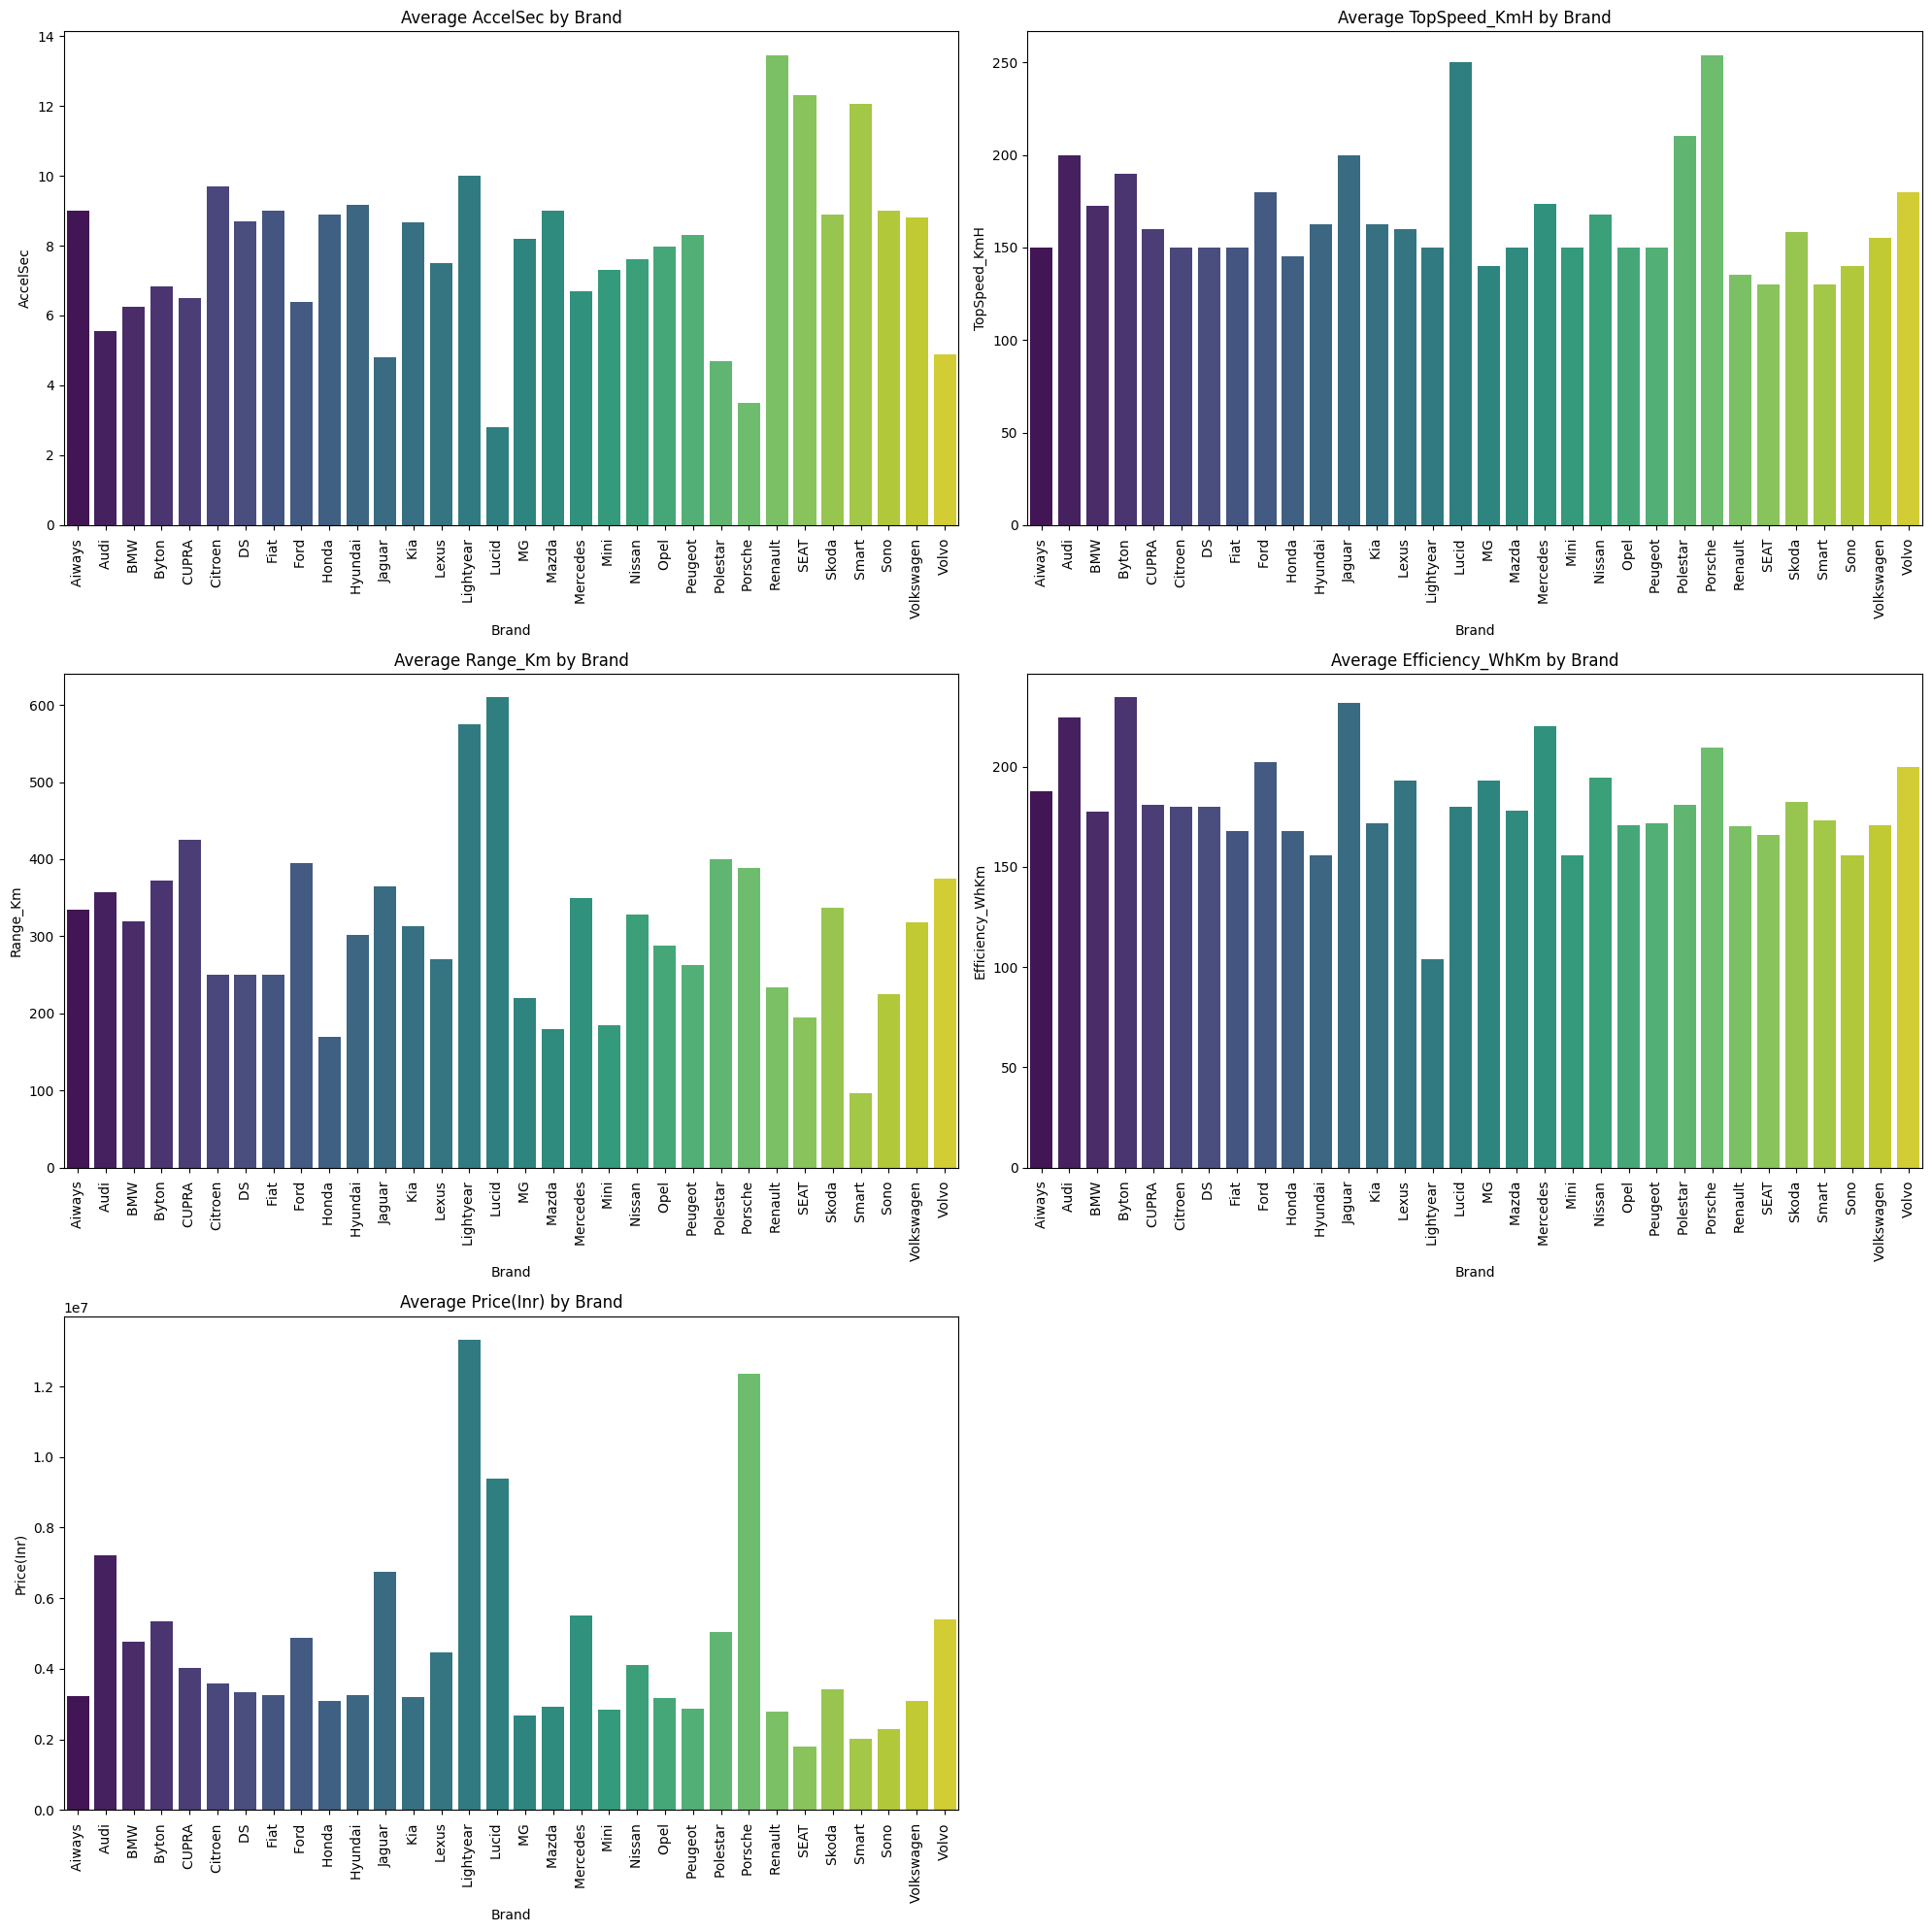

In [ ]:

# Calculating average metrics for each brand
brand_metrics = df.groupby('Brand').agg({
    'AccelSec': 'mean',
    'TopSpeed_KmH': 'mean',
    'Range_Km': 'mean',
    'Efficiency_WhKm': 'mean',
    'Price(Inr)': 'mean'
    }).reset_index()


# Plotting performance metrics by brand
metrics = ['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 'Price(Inr)']
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))

for i, metric in enumerate(metrics):
    row = i // 2
    col = i % 2
    sns.barplot(x='Brand', y=metric, data=brand_metrics, ax=axes[row, col], palette='viridis')
    axes[row, col].set_title(f'Average {metric} by Brand')
    axes[row, col].set_xlabel('Brand')
    axes[row, col].set_ylabel(metric)
    axes[row, col].tick_params(axis='x', rotation=90)

# Removing the empty subplot
fig.delaxes(axes[2][1])

plt.tight_layout()
plt.show()




**Analysis of EVs of different number of seats**

Seats        2  4  5  7
Brand                  
Aiways       0  0  1  0
Audi         0  1  8  0
BMW          0  2  2  0
Byton        0  0  3  0
CUPRA        0  1  0  0
Citroen      0  0  1  0
DS           0  0  1  0
Fiat         0  2  0  0
Ford         0  0  4  0
Honda        0  2  0  0
Hyundai      0  0  3  0
Jaguar       0  0  1  0
Kia          0  0  5  0
Lexus        0  0  1  0
Lightyear    0  0  1  0
Lucid        0  0  1  0
MG           0  0  1  0
Mazda        0  0  1  0
Mercedes     0  0  2  1
Mini         0  1  0  0
Nissan       0  0  7  1
Opel         0  0  3  0
Peugeot      0  0  2  0
Polestar     0  0  1  0
Porsche      0  5  0  0
Renault      0  1  4  0
SEAT         0  1  0  0
Skoda        0  1  5  0
Smart        2  1  0  0
Sono         0  0  1  0
Volkswagen   0  2  6  0
Volvo        0  0  1  0


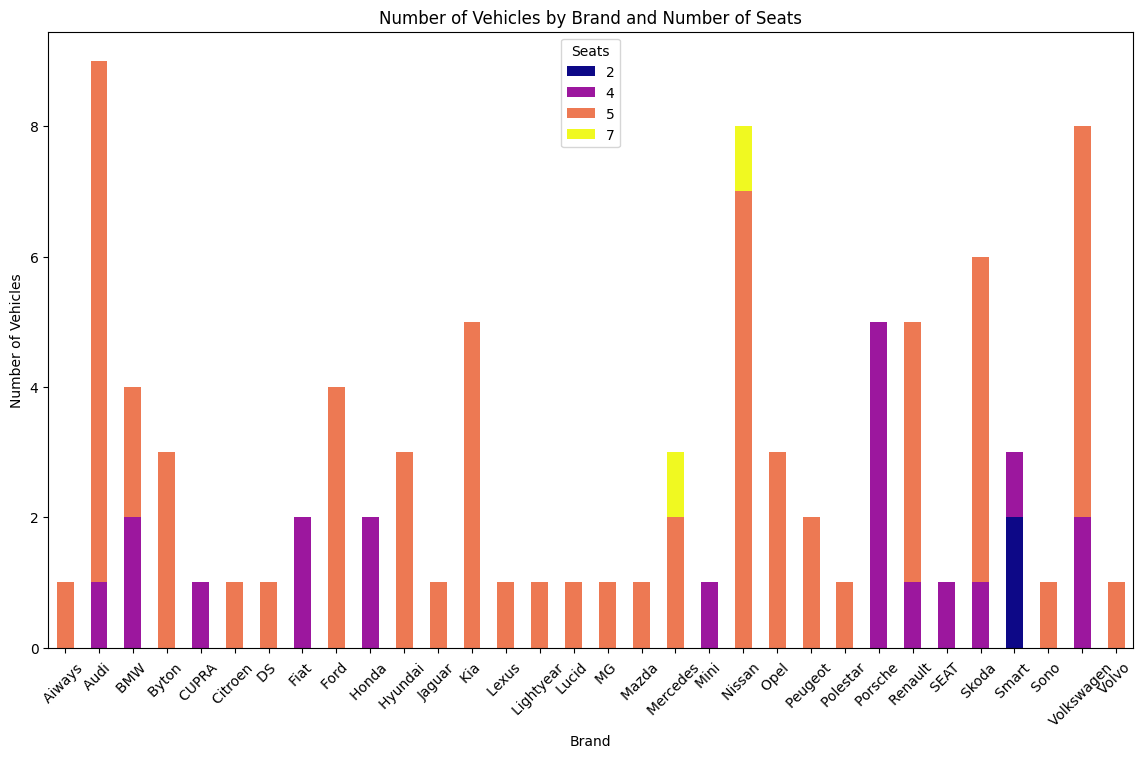

In [ ]:

grouped_by_seats = df.groupby(['Brand', 'Seats']).size().unstack(fill_value=0)
# Displaying the grouped data

print(grouped_by_seats)

grouped_by_seats.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='plasma')
plt.title('Number of Vehicles by Brand and Number of Seats')
plt.xlabel('Brand')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.legend(title='Seats')
plt.show()

### **Exploring Data**

\
**Principal components analysis**


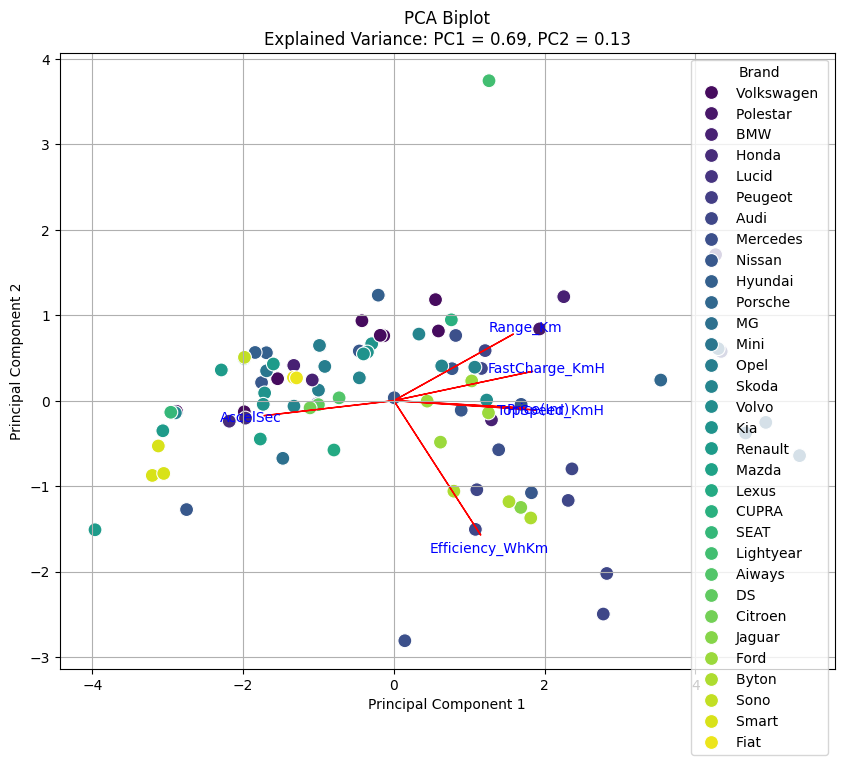

In [ ]:

# Selecting the numerical columns for PCA
numerical_cols = ['AccelSec', 'TopSpeed_KmH', 'Range_Km','Efficiency_WhKm','FastCharge_KmH','Price(Inr)']

# Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[numerical_cols])

# Performing PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
principal_components = pca.fit_transform(data_scaled)

# Creating a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Brand'] = df['Brand']

# Explained variance
explained_variance = pca.explained_variance_ratio_

#Plotting the biplot
plt.figure(figsize=(10, 8))

# Scattering plot of the first two principal components
sns.scatterplot(x='PC1', y='PC2', hue='Brand', data=pca_df, palette='viridis', s=100)

# Plotting the loadings (coefficients of the original variables)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
for i, col in enumerate(numerical_cols):
    #plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='r', alpha=1)
    scaling_factor = 2  # Adjust this value to stretch the arrow as needed
    plt.arrow(0, 0, scaling_factor * loadings[i, 0], scaling_factor * loadings[i, 1], color='r', alpha=1)

    plt.text(loadings[i, 0] * 2.2, loadings[i, 1] * 2.2, col, color='b', ha='center', va='center')

plt.title(f'PCA Biplot\nExplained Variance: PC1 = {explained_variance[0]:.2f}, PC2 = {explained_variance[1]:.2f}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Brand', loc='best')
plt.grid(True)
plt.show()


**MOSAIC PLOT**

In [ ]:
pip install pandas matplotlib statsmodels

<Figure size 1500x1000 with 0 Axes>

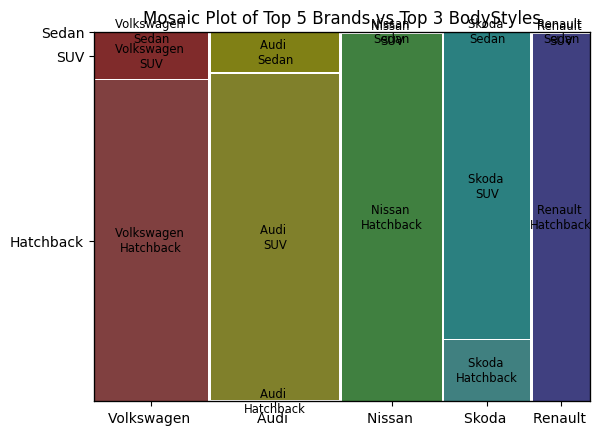

In [ ]:


# Determining the top 5 brands and top 3 body styles based on their frequency
top_brands = df['Brand'].value_counts().head(5).index
top_body_styles = df['BodyStyle'].value_counts().head(3).index

# Filtering the dataset to include only the top brands and body styles
filtered_data = df[df['Brand'].isin(top_brands) & df['BodyStyle'].isin(top_body_styles)]

# Creating a mosaic plot with the filtered data
plt.figure(figsize=(15, 10))

mosaic(filtered_data, ['Brand', 'BodyStyle'], title='Mosaic Plot of Top 5 Brands vs Top 3 BodyStyles')
plt.show()


**Creating PCA components using Rotation Matrix**

In [ ]:
pca = PCA()
pca.fit(data_scaled)

# Rotational matrix
rotation_matrix = pca.components_

rotation_matrix_df=pd.DataFrame(rotation_matrix, columns=numerical_cols)


rotation_matrix_df.index = [f'PC{i+1}' for i in range(len(rotation_matrix))]
print(rotation_matrix_df)

     AccelSec  TopSpeed_KmH  Range_Km  Efficiency_WhKm  FastCharge_KmH  \
PC1 -0.420148      0.461459  0.386692         0.280908        0.449100   
PC2 -0.097291     -0.060689  0.432326        -0.872601        0.190289   
PC3  0.368892      0.233048 -0.497686        -0.319176        0.099255   
PC4  0.710709     -0.283535  0.545141         0.232667        0.151871   
PC5 -0.197591     -0.047859  0.302330        -0.026861       -0.811139   
PC6  0.365759      0.803976  0.165198        -0.054128       -0.266903   

     Price(Inr)  
PC1    0.424736  
PC2   -0.047998  
PC3    0.670963  
PC4    0.200308  
PC5    0.456723  
PC6   -0.344071  


**Elbow Method For Optimal k**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

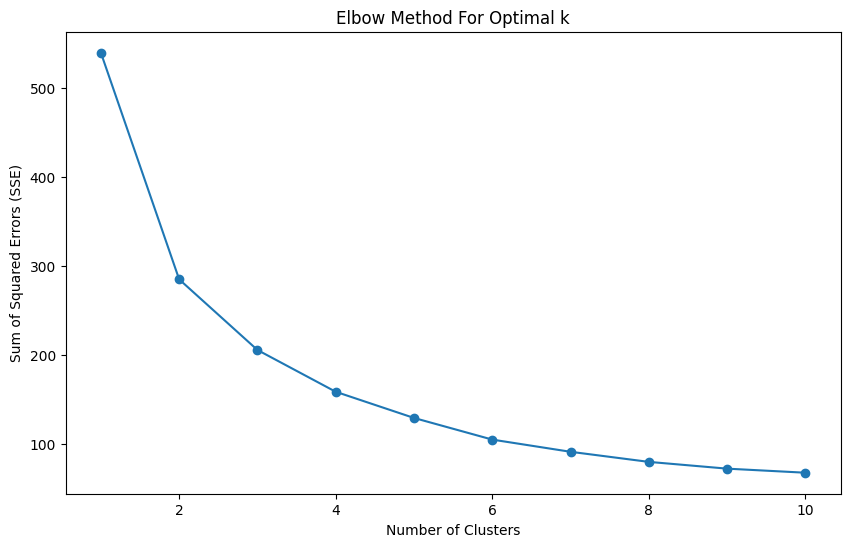

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:



# Determining the optimal number of clusters using the elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

# Plotting the elbow curve


plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method For Optimal k')
plt.show()

# Choosing the optimal number of clusters (e.g., k=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(data_scaled)

# Adding the cluster labels to the original dataset
df['Cluster'] = kmeans.labels_







# **Global stability of k-means segmentation solutions**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

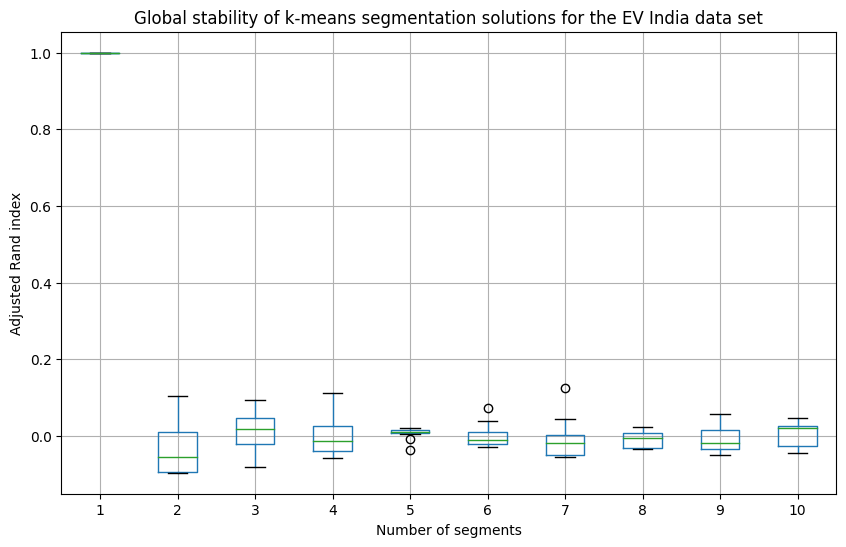

In [ ]:

# Assuming 'numeric_cols' includes the necessary numeric columns for clustering
numeric_cols = ['Price(Inr)', 'TopSpeed_KmH', 'Range_Km', 'AccelSec', 'Efficiency_WhKm', 'FastCharge_KmH']
X = df[numeric_cols]

#  calculating adjusted Rand index for different k values
def calculate_ari(X, k_values, n_init=10):
    ari_scores = {k: [] for k in k_values}
    for k in k_values:
        for _ in range(n_init):
            X_train, X_test = train_test_split(X, test_size=0.5, random_state=None)
            kmeans_train = KMeans(n_clusters=k, random_state=None).fit(X_train)
            kmeans_test = KMeans(n_clusters=k, random_state=None).fit(X_test)
            labels_train = kmeans_train.predict(X_train)
            labels_test = kmeans_test.predict(X_test)
            ari_score = adjusted_rand_score(labels_train, labels_test)
            ari_scores[k].append(ari_score)
    return ari_scores

# Calculating adjusted Rand index for k values from 2 to 8
k_values = range(1, 11)
ari_scores = calculate_ari(X, k_values)

# Converting the ARI scores to a DataFrame for plotting
ari_df = pd.DataFrame(ari_scores)

# Plotting the boxplot
plt.figure(figsize=(10, 6))
ari_df.boxplot()
plt.xlabel('Number of segments')
plt.ylabel('Adjusted Rand index')
plt.title('Global stability of k-means segmentation solutions for the EV India data set')
plt.show()


**Gorge plot of the four-segment k-means solution**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


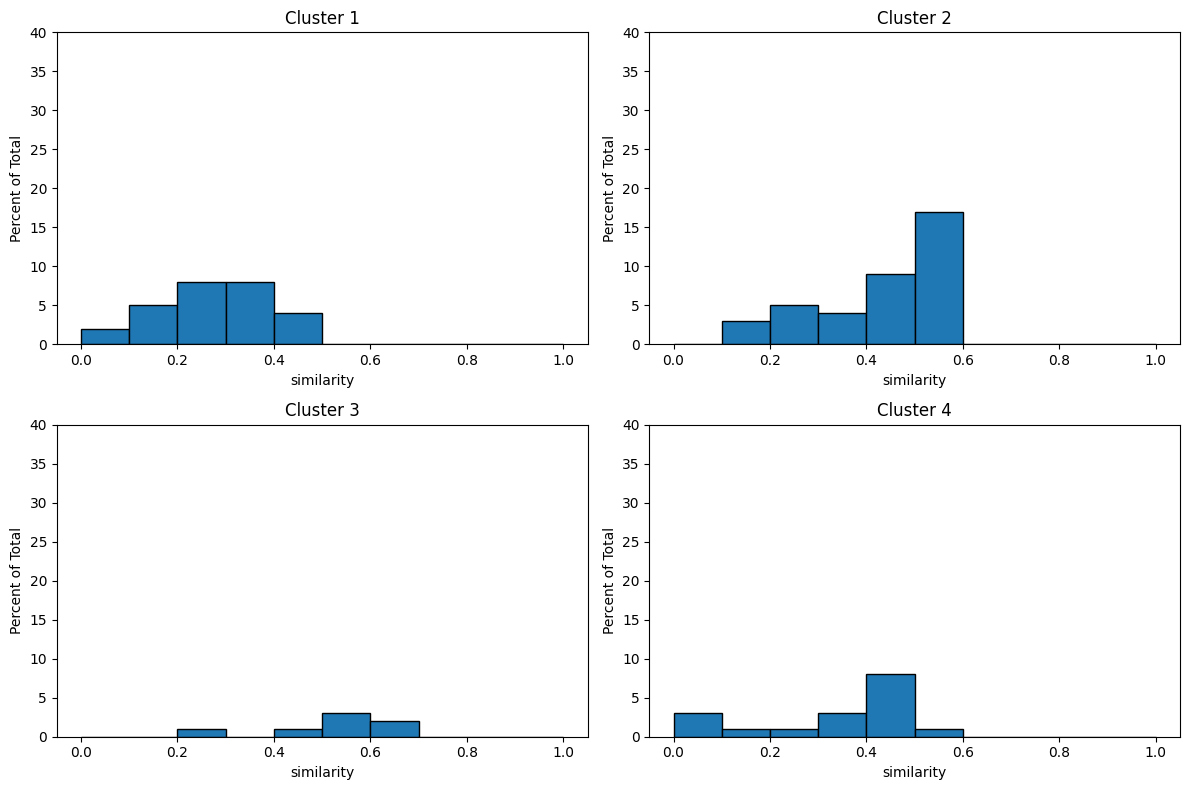

In [ ]:

# Standardizing the features

X_scaled = scaler.fit_transform(X)

# Choosing the optimal number of clusters (for example, let's assume k=4 based on the elbow plot)
optimal_k = 4

# Fitting the k-means model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)
#print(cluster_labels)
# Compute the silhouette scores for each sample
silhouette_vals = silhouette_samples(X_scaled, cluster_labels)
#print(silhouette_vals)

# Creating a DataFrame to hold the silhouette scores and cluster labels
silhouette_df = pd.DataFrame({
    'silhouette': silhouette_vals,
    'cluster': cluster_labels
})

# Plotting the gorge plot
plt.figure(figsize=(12, 8))

for i in range(optimal_k):
    plt.subplot(2, 2, i + 1)
    cluster_silhouette_vals = silhouette_df[silhouette_df['cluster'] == i]['silhouette']
    plt.hist(cluster_silhouette_vals, bins=10, range=(0, 1), edgecolor='black')
    plt.title(f'Cluster {i+1}')
    plt.xlabel('similarity')
    plt.ylabel('Percent of Total')
    plt.ylim(0, 40)  # Adjust the y-axis limit based on your data

plt.tight_layout()
plt.show()


 **Segment level stability across solutions (SLSA) plot**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

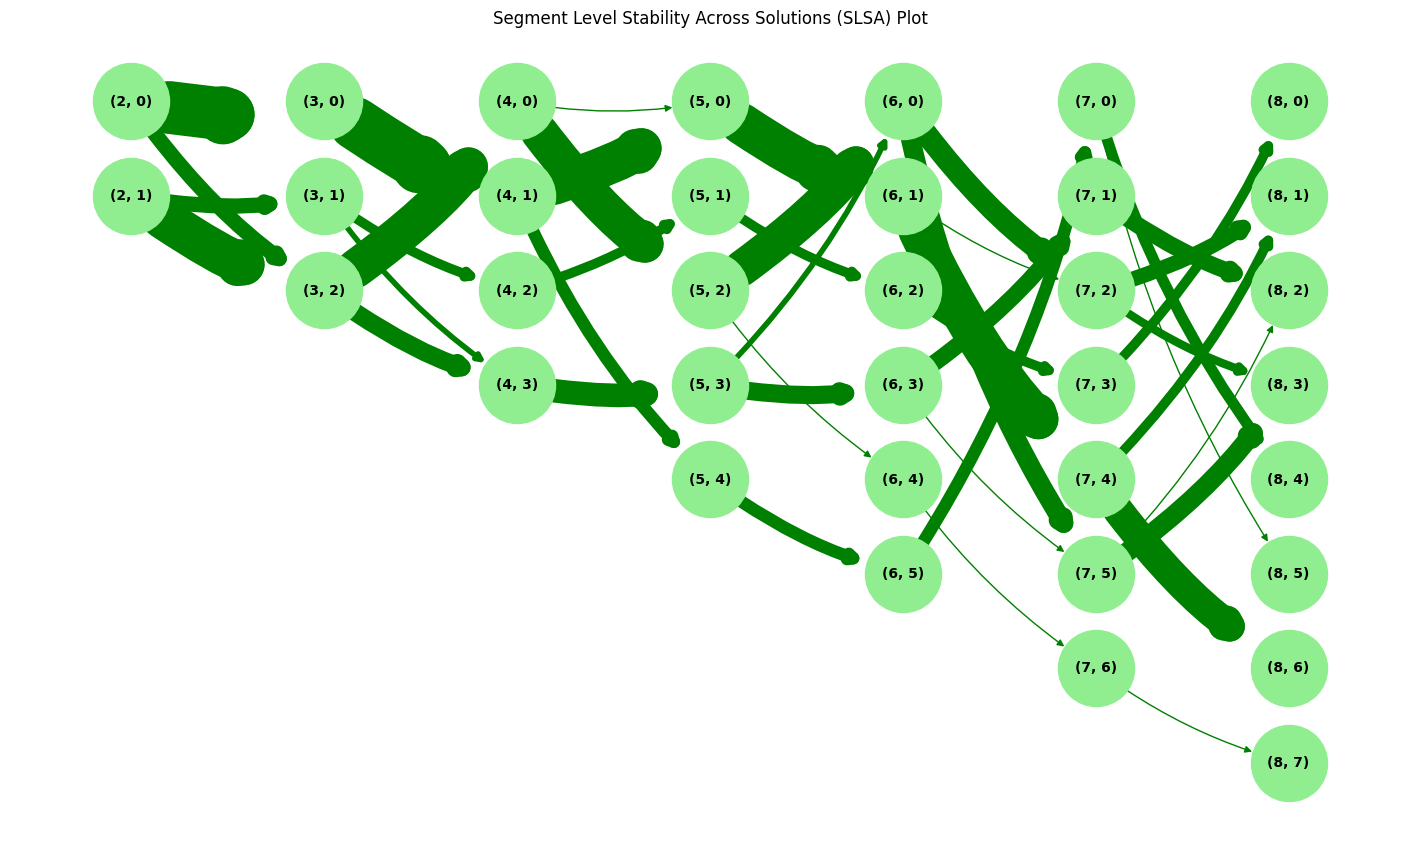

In [ ]:
import networkx as nx


# Defining the range of k values to test
k_range = range(2, 9)  # Adjusting the range based on the plot provided

# Initializing a list to store cluster labels
all_cluster_labels = []

# Performing k-means clustering for each value of k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    all_cluster_labels.append(cluster_labels)
sls_values = {k: {} for k in k_range}
# Creating the graph
G = nx.DiGraph()

# Adding nodes and edges with weights based on ARI scores
for i, k in enumerate(k_range[:-1]):
    labels_k = all_cluster_labels[i]
    labels_k_next = all_cluster_labels[i + 1]

    unique_labels_k = set(labels_k)
    unique_labels_k_next = set(labels_k_next)

    for label in unique_labels_k:
        G.add_node((k, label), level=k, cluster=label)

    for label in unique_labels_k_next:
        G.add_node((k + 1, label), level=k + 1, cluster=label)

    for label_k in unique_labels_k:
        for label_k_next in unique_labels_k_next:
            indices_k = [idx for idx, lbl in enumerate(labels_k) if lbl == label_k]
            indices_k_next = [idx for idx, lbl in enumerate(labels_k_next) if lbl == label_k_next]
            common_indices = set(indices_k).intersection(indices_k_next)
            weight = len(common_indices)

            if weight > 0:
                G.add_edge((k, label_k), (k + 1, label_k_next), weight=weight)



# Drawing the graph
pos = {}
for node in G.nodes():
    pos[node] = (node[0], -node[1])

edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]

plt.figure(figsize=(14, 8))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightgreen', font_size=10, font_weight='bold', width=weights, edge_color='green', connectionstyle='arc3,rad=0.1')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.show()


#  Segment level stability within solutions(SLSW) plot

---



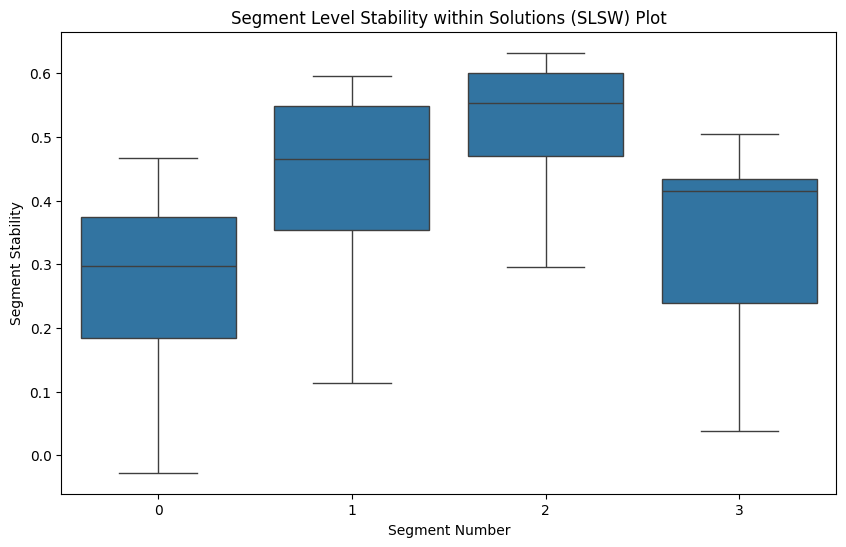

In [ ]:


# Plotting the SLSW plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='silhouette', data=silhouette_df)
plt.title('Segment Level Stability within Solutions (SLSW) Plot')
plt.xlabel('Segment Number')
plt.ylabel('Segment Stability')
plt.show()


*** Information criteria for the mixture models of binary distributions***

   k    logLik         AIC          BIC          ICL
0  2 -4.279855  880.268350  1017.757882  1025.852573
1  3 -3.794817  849.047009  1056.531212  1063.144139
2  4 -2.950396  753.050600  1030.529473  1036.520731
3  5 -1.798403  601.712327   949.185871   950.322990
4  6 -1.798461  657.722898  1075.191113  1077.805674
5  7 -1.065351  581.762546  1069.225432  1070.423212
6  8  0.241660  402.486640   959.944197   965.424898


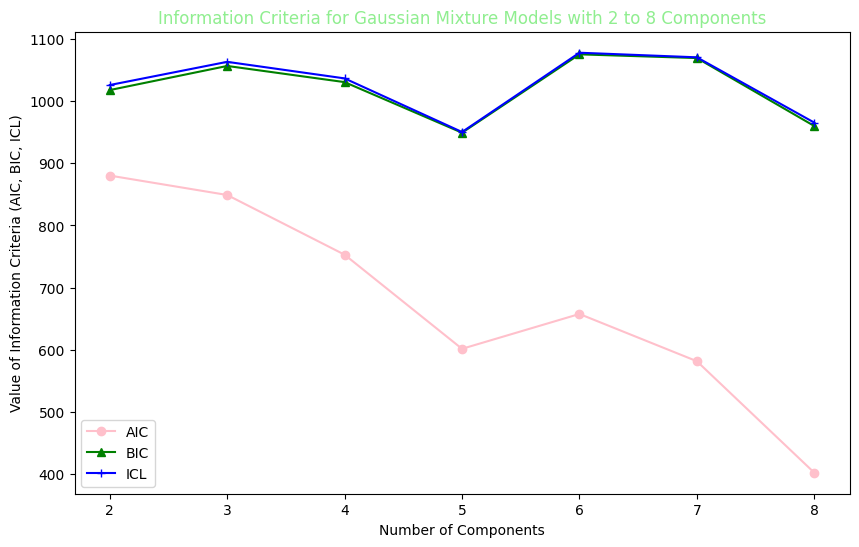

In [ ]:


k_range = range(2, 9)
metrics = []
log_likelihoods = []
aics = []
bics = []
icls = []

# Function to compute entropy
def compute_entropy(resp):
    return -np.sum(resp * np.log(resp + 1e-10))

# Model-based clustering for each value of k
for k in k_range:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X_scaled)
    log_likelihood = gmm.lower_bound_
    aic = gmm.aic(X_scaled)
    bic = gmm.bic(X_scaled)

    # Computing responsibilities (posterior probabilities)
    responsibilities = gmm.predict_proba(X_scaled)

    entropy = compute_entropy(responsibilities)
    icl = bic + 2 * entropy

    log_likelihoods.append(log_likelihood)
    aics.append(aic)
    bics.append(bic)
    icls.append(icl)
    metrics.append([k, log_likelihood, aic, bic, icl])
# Creating a DataFrame to display the metrics
metrics_df = pd.DataFrame(metrics, columns=['k', 'logLik', 'AIC', 'BIC', 'ICL'])
print(metrics_df)

# Plotting the information criteria
plt.figure(figsize=(10, 6))
plt.plot(k_range, aics, 'o-', label='AIC', color='pink')
plt.plot(k_range, bics, '^-', label='BIC', color='green')
plt.plot(k_range, icls, '+-', label='ICL', color='blue')

# Adding title and labels
plt.title('Information Criteria for Gaussian Mixture Models with 2 to 8 Components', color = 'lightgreen')
plt.xlabel('Number of Components')
plt.ylabel('Value of Information Criteria (AIC, BIC, ICL)')
plt.legend()

# Showing the plot
plt.show()

**Comparison table**





In [ ]:
# Best number of components (k=4) from the given plot
best_k = 4

# Fitting the best Gaussian Mixture Model
best_gmm = GaussianMixture(n_components=best_k, covariance_type='full', random_state=42)
best_gmm.fit(X_scaled)
mixture_clusters = best_gmm.predict(X_scaled)

# Clustering using KMeans with k=4
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(X_scaled)
kmeans_clusters = kmeans.labels_
print(kmeans_clusters)
# Create a DataFrame to compare clusters
comparison_df = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': mixture_clusters})
comparison_table = pd.crosstab(comparison_df['kmeans'], comparison_df['mixture'])

print("Cluster Comparison Table:")
print(comparison_table)

[1 0 3 1 2 1 1 0 3 1 0 0 1 0 2 1 1 1 1 1 2 0 0 0 1 1 3 0 1 1 0 1 0 1 0 1 3
 1 1 0 1 2 0 0 3 1 0 1 1 1 1 1 0 3 0 2 1 1 3 1 0 2 3 1 1 0 1 3 2 0 1 0 3 1
 3 0 0 3 1 0 3 1 0 1 3 0 3 0 3 3]
Cluster Comparison Table:
mixture   0   1   2  3
kmeans                
0        11   6  11  0
1        38   0   0  0
2         0   0   0  7
3         0  16   1  0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Contingency Table**

In [ ]:
# Performing Gaussian Mixture Model clustering
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

# Creating a DataFrame to compare cluster assignments
comparison_df = pd.DataFrame({'KMeans': cluster_labels, 'GMM': gmm_labels})

# Printing the contingency table
contingency_table = pd.crosstab(comparison_df['KMeans'], comparison_df['GMM'])
print(contingency_table)

GMM      0   1   2  3
KMeans               
0        0   0   0  7
1       18   0   0  0
2        0  13   0  0
3        0   9  11  0
4        8   0   0  0
5        1   0   0  0
6       22   0   0  0
7        0   0   1  0


**Summary Statistics**

In [ ]:


# Preparing the data: Create a binary outcome variable
df['HighPrice'] = (df['Price(Inr)'] > 5000000).astype(int)

# Selecting the predictor variables and adding a constant term for the intercept
X = df[['Range_Km', 'Efficiency_WhKm', 'TopSpeed_KmH']]
X = sm.add_constant(X)

# The outcome variable
y = df['HighPrice']

# Fitting the logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Displaying the summary of the regression results
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.185416
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:              HighPrice   No. Observations:                   90
Model:                          Logit   Df Residuals:                       86
Method:                           MLE   Df Model:                            3
Date:                Wed, 19 Jun 2024   Pseudo R-squ.:                  0.6965
Time:                        11:24:36   Log-Likelihood:                -16.687
converged:                       True   LL-Null:                       -54.978
Covariance Type:            nonrobust   LLR p-value:                 1.661e-16
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -37.2324     10.863     -3.427      0.001     -58.524     -15.941
Range_Km     

**Regression Coefficients of the Linear Regression Model**

<ipython-input-22-8f95cd9ae486>:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=coef_df.index, y=coef_df['Coefficient'], palette="viridis", ci=None)
<ipython-input-22-8f95cd9ae486>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coef_df.index, y=coef_df['Coefficient'], palette="viridis", ci=None)


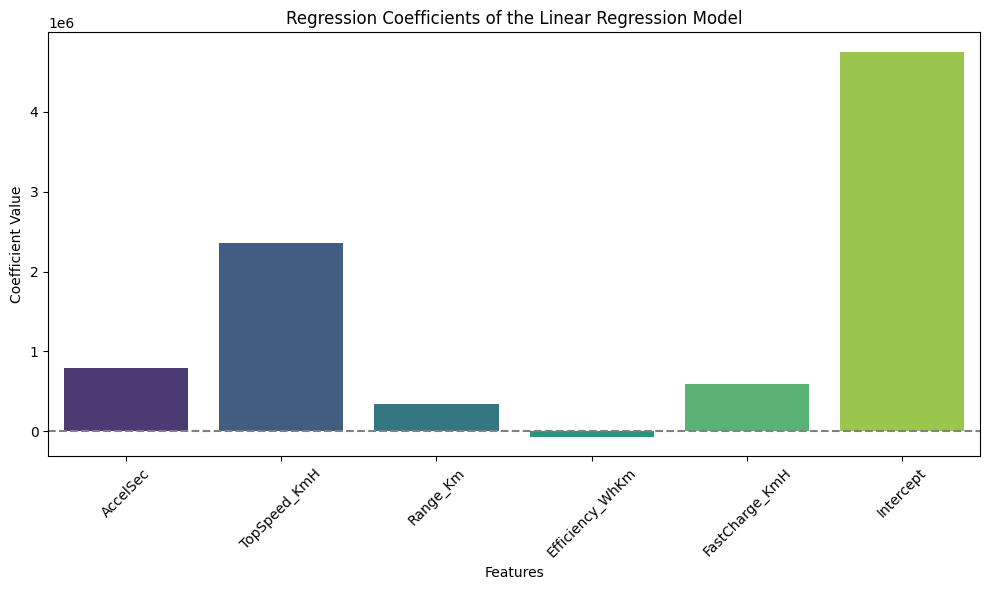

In [ ]:
features = ['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 'FastCharge_KmH', 'Price(Inr)']
X2 = df[features]
# Standardize the data for better model performance
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[features[:-1]])
data_scaled = pd.DataFrame(data_scaled, columns=features[:-1])
data_scaled['Price(Inr)'] = df['Price(Inr)'].values

# Split the data into training and testing sets
X = data_scaled[features[:-1]]
y = data_scaled['Price(Inr)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Extract coefficients and intercept
coef = lr.coef_
intercept = lr.intercept_

# Create a DataFrame for the coefficients
coef_df = pd.DataFrame(coef, index=features[:-1], columns=['Coefficient'])
coef_df.loc['Intercept'] = intercept

# Plotting the coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x=coef_df.index, y=coef_df['Coefficient'], palette="viridis", ci=None)
plt.axhline(0, color='grey', linestyle='--')
plt.title('Regression Coefficients of the Linear Regression Model')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Segment Profiles**





/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


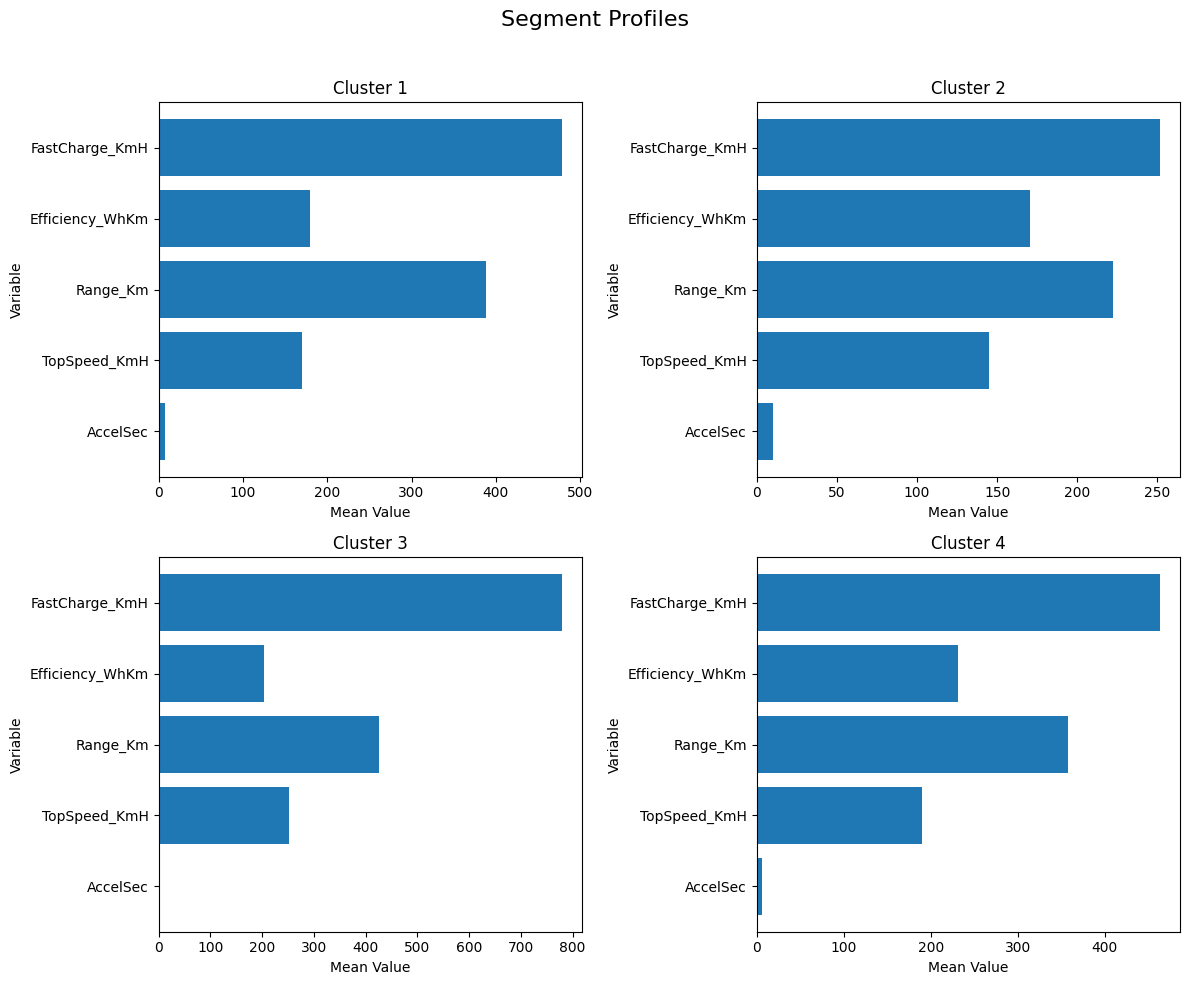

In [ ]:
numeric_cols = ['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 'FastCharge_KmH']
X = df[numeric_cols]

# Now, let's apply K-means clustering to the scaled dataset X_scaled.
# Specify the number of clusters
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
# Perform K-means clustering
kmeans.fit(X_scaled)
# Get cluster labels
cluster_labels = kmeans.labels_
# Assign cluster labels to the original dataframe
df['Cluster'] = cluster_labels
# After clustering, computing and examining the cluster means.
cluster_means = df.groupby('Cluster')[numeric_cols].mean()

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plotting the bar charts for each cluster
for i in range(k):
    ax = axs.flat[i]
    ax.barh(range(cluster_means.shape[1]), cluster_means.iloc[i], align='center')
    ax.set_title(f'Cluster {i+1}')
    ax.set_yticks(range(cluster_means.shape[1]))
    ax.set_yticklabels(X.columns)

# General plot settings
for ax in axs.flat:
    ax.set(xlabel='Mean Value', ylabel='Variable')

fig.suptitle('Segment Profiles', fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the title
plt.show()

**Segment separation plot using principal components 1 and 2**

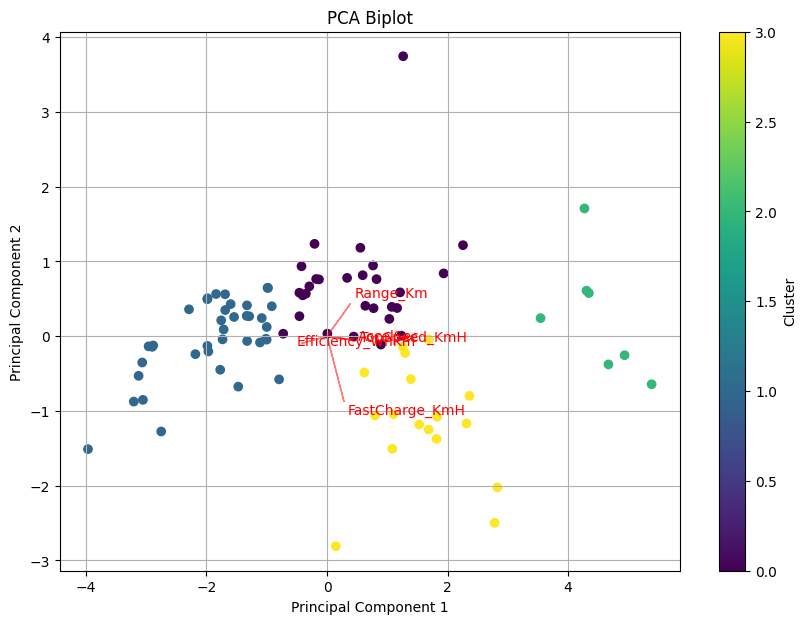

In [ ]:




# Applying PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Creating a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df = pd.concat([pca_df, df[['Cluster']]], axis=1)

# Plot the biplot
plt.figure(figsize=(10, 7))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', marker='o')

# Add annotations for loadings
for i, (varname, vec) in enumerate(zip(numeric_cols, pca.components_.T)):
    plt.arrow(0, 0, vec[0], vec[1], color='r', alpha=0.5)
    plt.text(vec[0] * 1.2, vec[1] * 1.2, varname, color='r')

# Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Biplot')
plt.grid()
plt.colorbar(scatter, label='Cluster')

plt.show()


**Mosaic plot for cluster membership & price range**



<Figure size 1200x800 with 0 Axes>

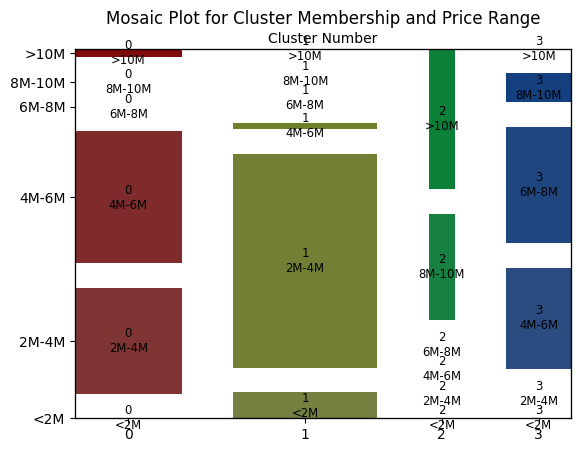

In [ ]:
# Creating a categorical variable based on Price(Inr)
bins = [0, 2000000, 4000000, 6000000, 8000000, 10000000, float('inf')]
labels = ['<2M', '2M-4M', '4M-6M', '6M-8M', '8M-10M', '>10M']
df['Price_Range'] = pd.cut(df['Price(Inr)'], bins=bins, labels=labels)


# Crosstabulation of Cluster and the categorical variable (Price_Range)
crosstab = pd.crosstab(df['Cluster'], df['Price_Range'])

# Plotting the mosaic plot
plt.figure(figsize=(12, 8))
mosaic(crosstab.stack(), gap=0.15)
plt.title('Mosaic Plot for Cluster Membership and Price Range')
plt.xlabel('Cluster Number')
plt.ylabel('Price Range')
plt.show()


**Parallel box-and-whisker plot of age by segment**

<Figure size 1200x800 with 0 Axes>

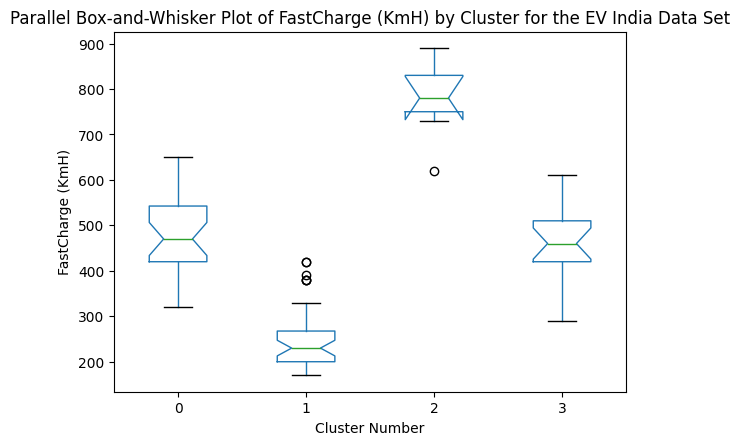

In [ ]:


# Creating the box plot
plt.figure(figsize=(12, 8))
df.boxplot(column='FastCharge_KmH', by='Cluster', notch=True, grid=False)

# Setting the labels and title
plt.xlabel('Cluster Number')
plt.ylabel('FastCharge (KmH)')
plt.title('Parallel Box-and-Whisker Plot of FastCharge (KmH) by Cluster for the EV India Data Set')
plt.suptitle('')

# Showing the plot
plt.show()


**Decision tree for cluster membership**

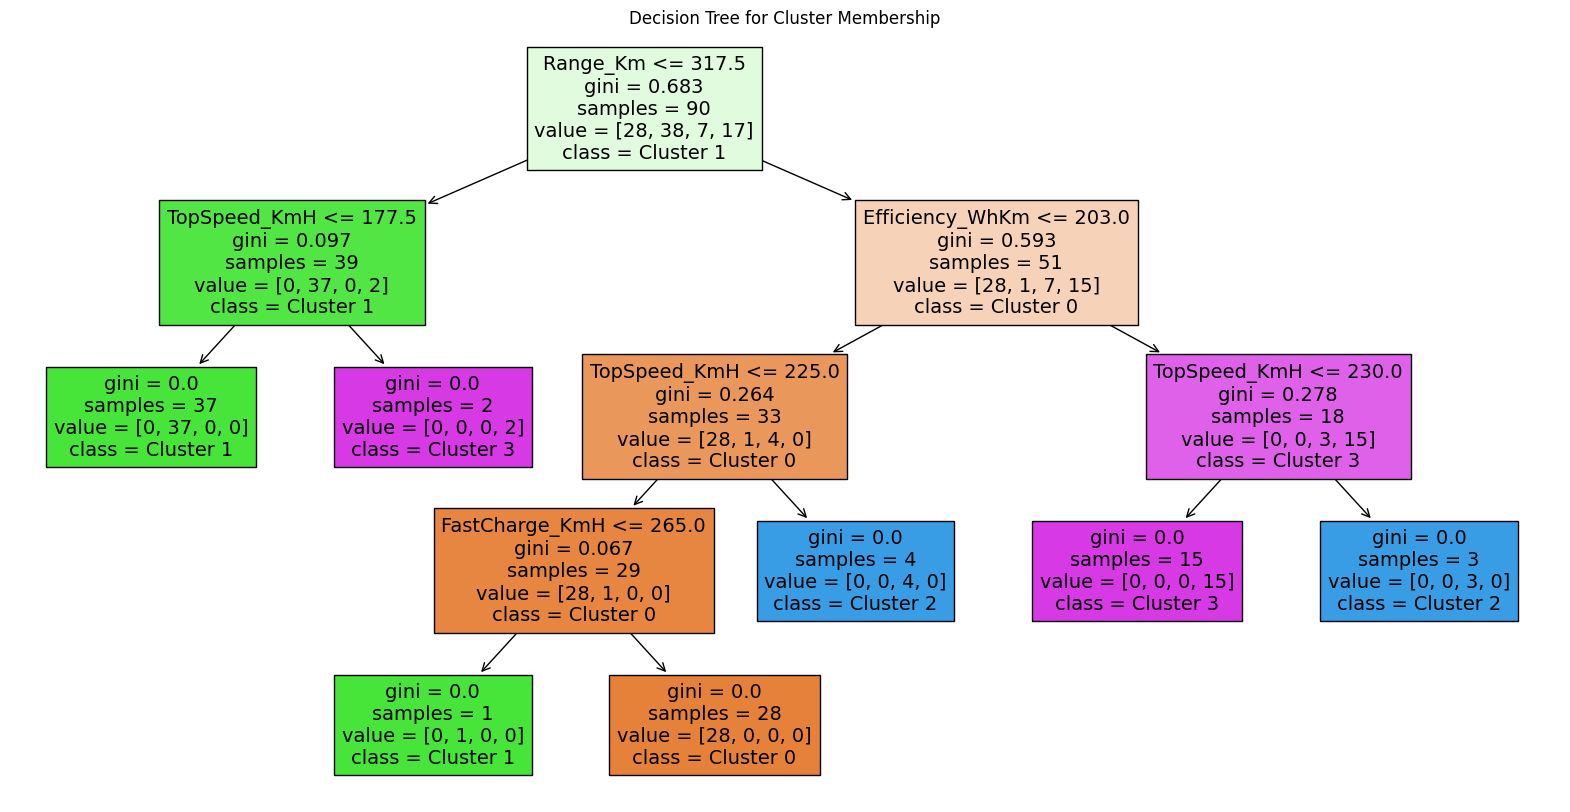

'ev_india_decision_tree.pdf'

In [ ]:

# Defining the features and the target
X_features = df[numeric_cols]
y_target = df['Cluster']

# Fitting the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_features, y_target)

# Visualizing the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=numeric_cols, class_names=[f'Cluster {i}' for i in range(k)], filled=True)
plt.title("Decision Tree for Cluster Membership")
plt.show()

#
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=numeric_cols,
                           class_names=[f'Cluster {i}' for i in range(k)],
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("ev_india_decision_tree")


**Relationship between Price,Topspeed and Range**

Mean Values:
Price(Inr)      4.675252e+06
TopSpeed_KmH    1.697667e+02
Range_Km        3.153889e+02
dtype: float64


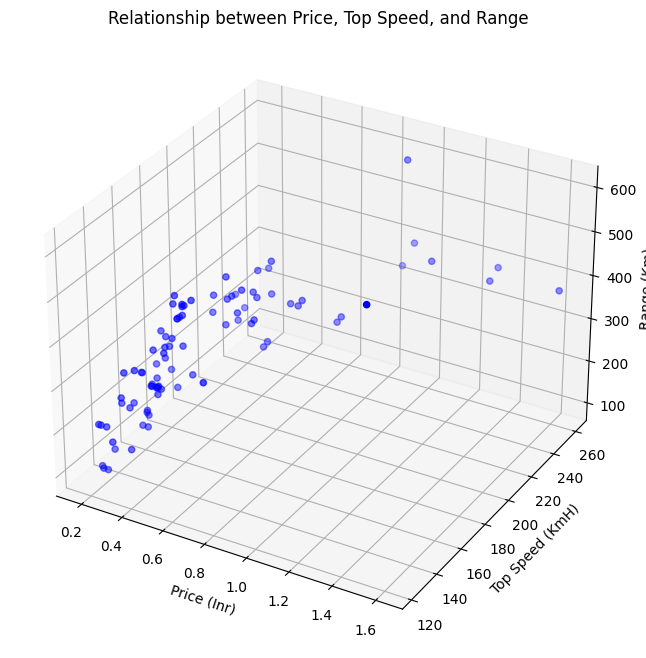

In [ ]:




# Selecting relevant columns
data = df[['Price(Inr)', 'TopSpeed_KmH', 'Range_Km']]

# Computing the mean values for price, top speed, and range
mean_values = data.mean()
print("Mean Values:")
print(mean_values)

# Creating a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting the data points
ax.scatter(data['Price(Inr)'], data['TopSpeed_KmH'], data['Range_Km'], c='b', marker='o')

# Setting labels
ax.set_xlabel('Price (Inr)')
ax.set_ylabel('Top Speed (KmH)')
ax.set_zlabel('Range (Km)')

# Setting title
ax.set_title('Relationship between Price, Top Speed, and Range')

# Showing plot
plt.show()


**simple segment evaluation plot**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-30-dfc10c5bff8e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster'] = cluster_labels


   Cluster    Price(Inr)  TopSpeed_KmH    Range_Km
0        0  2.799788e+06    144.515152  210.000000
1        1  5.702435e+06    191.538462  371.923077
2        2  3.669430e+06    157.391304  358.043478
3        3  1.196494e+07    238.750000  443.750000


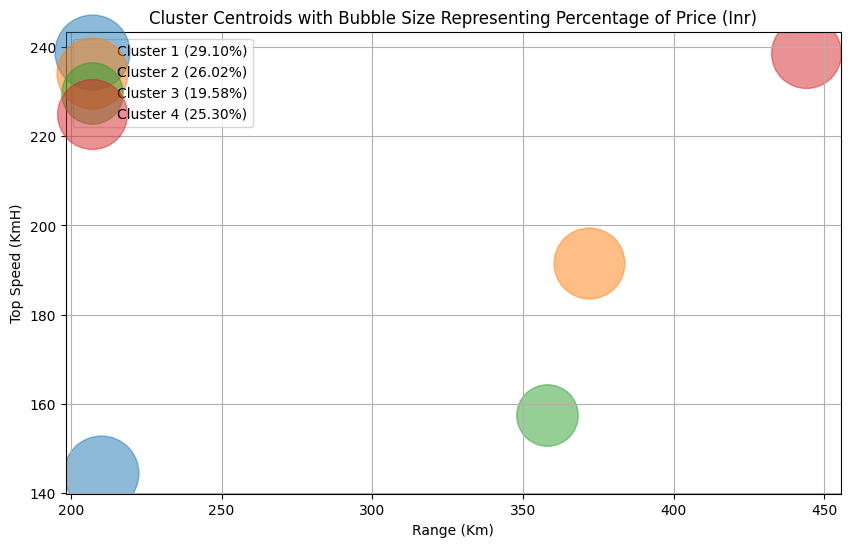

In [ ]:
# Selecting the relevant features
features = ['Price(Inr)', 'TopSpeed_KmH', 'Range_Km']

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[features])

# Performing KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Adding the cluster labels to the original dataframe
data['Cluster'] = cluster_labels

# Computing the mean value of the price, topspeed, and range for each cluster
cluster_means = data.groupby('Cluster')[features].mean().reset_index()

print(cluster_means)

# Calculating the total Price(Inr) for each cluster
cluster_total_price = df.groupby('Cluster')['Price(Inr)'].sum()

# Calculating the total Price(Inr) for all data
total_price = df['Price(Inr)'].sum()

# Calculating the percentage of Price(Inr) for each cluster
cluster_percentage = (cluster_total_price / total_price) * 100

# Creating a bubble plot
plt.figure(figsize=(10, 6))

# Scattering plot for each cluster
for cluster in range(i):
    plt.scatter(cluster_means.loc[cluster, 'Range_Km'],
                cluster_means.loc[cluster, 'TopSpeed_KmH'],
                s=cluster_percentage[cluster] * 100,  # Bubble size proportional to percentage of Price(Inr)
                alpha=0.5,
                label=f'Cluster {cluster+1} ({cluster_percentage[cluster]:.2f}%)')

# Adding labels and legend
plt.xlabel('Range (Km)')
plt.ylabel('Top Speed (KmH)')
plt.title('Cluster Centroids with Bubble Size Representing Percentage of Price (Inr)')
plt.legend()
plt.grid(True)
plt.show()